In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import cufflinks as cf

In [28]:
cf.go_offline()

# Principal Component Analysis

In [3]:
diamonds = pd.read_csv("datasets/diamonds.csv")

In [4]:
diamonds.drop('Unnamed: 0', axis='columns', inplace=True)

### 1. Identify our features

In [5]:
features = diamonds.drop('cut', axis='columns')

### 2. Create Dummy Variables

In [6]:
dummies = pd.get_dummies(features, drop_first=True)

### 3. Scale the variables

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dummies)
scaled = scaler.transform(dummies)

In [8]:
scaled = pd.DataFrame(scaled)

### Create Principal Components

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=3)

In [15]:
pca.fit(scaled)

PCA(n_components=3)

In [16]:
principal_components = pca.transform(scaled)

In [17]:
principal_components = pd.DataFrame(principal_components, columns=['x', 'y', 'z'])

# visualize data

In [30]:
#pd.concat([principal_components, diamonds.cut], axis='columns').iplot(x='x', y='y', z='z', kind='scatter3d', categories='cut')

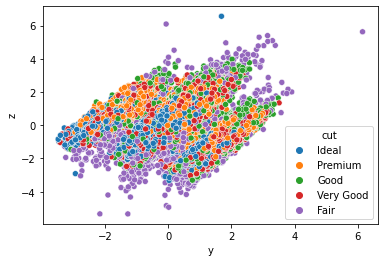

In [25]:
#sns.scatterplot(x=principal_components.y, y=principal_components.z, hue=diamonds.cut)
#plt.show()

### Create train test splits

In [32]:
from sklearn.model_selection import train_test_split
feat_train, feat_test, label_train, label_test = train_test_split(principal_components, diamonds.cut, test_size=0.2, random_state=101)

### Apply Principal Components to ML Algorithms

In [44]:
##KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=27)
knn.fit(feat_train, label_train)
kpred = knn.predict(feat_test)

In [37]:
##SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(feat_train, label_train)
spred = svc.predict(feat_test)

In [38]:
##Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()
dtc.fit(feat_train, label_train)
dpred = dtc.predict(feat_test)

In [40]:
##Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_estimators=1000)
rfc.fit(feat_train, label_train)
rpred = rfc.predict(feat_test)

### Evaluate our models

In [42]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(kpred, label_test))

              precision    recall  f1-score   support

        Fair       0.21      0.64      0.32       106
        Good       0.16      0.39      0.23       400
       Ideal       0.84      0.58      0.69      6153
     Premium       0.58      0.50      0.53      3217
   Very Good       0.14      0.36      0.20       912

    accuracy                           0.53     10788
   macro avg       0.38      0.49      0.39     10788
weighted avg       0.67      0.53      0.58     10788



In [46]:
print(classification_report(spred, label_test))

              precision    recall  f1-score   support

        Fair       0.11      0.73      0.20        51
        Good       0.02      0.43      0.04        49
       Ideal       0.89      0.49      0.63      7765
     Premium       0.47      0.45      0.46      2911
   Very Good       0.00      0.58      0.01        12

    accuracy                           0.48     10788
   macro avg       0.30      0.54      0.27     10788
weighted avg       0.77      0.48      0.58     10788



In [47]:
print(classification_report(dpred, label_test))

              precision    recall  f1-score   support

        Fair       0.35      0.38      0.37       302
        Good       0.34      0.33      0.34       990
       Ideal       0.67      0.68      0.67      4240
     Premium       0.49      0.48      0.48      2854
   Very Good       0.26      0.26      0.26      2402

    accuracy                           0.49     10788
   macro avg       0.42      0.43      0.42     10788
weighted avg       0.49      0.49      0.49     10788



In [48]:
print(classification_report(rpred, label_test))

              precision    recall  f1-score   support

        Fair       0.33      0.65      0.44       167
        Good       0.31      0.49      0.38       622
       Ideal       0.82      0.68      0.75      5164
     Premium       0.59      0.53      0.55      3107
   Very Good       0.21      0.30      0.25      1728

    accuracy                           0.56     10788
   macro avg       0.45      0.53      0.47     10788
weighted avg       0.62      0.56      0.59     10788



# Linear Discriminant Analysis

In [52]:
#Create splits for LDA
feat_train2, feat_test2, label_train2, label_test2 = train_test_split(scaled, diamonds.cut, test_size=0.2, random_state=101)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [71]:
lda = LDA(n_components=1)

In [72]:
lda.fit(feat_train2, label_train2)

LinearDiscriminantAnalysis(n_components=1)

In [54]:
feat_train2 = lda.transform(feat_train2)
feat_test2 = lda.transform(feat_test2)

In [56]:
##KNN
knn2 = KNN(n_neighbors=7)
knn2.fit(feat_train2, label_train2)
kpred2 = knn2.predict(feat_test2)

In [57]:
##SVC
svc2 = SVC()
svc2.fit(feat_train2, label_train2)
spred2 = svc2.predict(feat_test2)

In [58]:
dtc2 = DTC()
dtc2.fit(feat_train2, label_train2)
dpred2 = dtc2.predict(feat_test2)

In [59]:
rfc2 = RFC(n_estimators=500)
rfc2.fit(feat_train2, label_train2)
rpred2 = rfc2.predict(feat_test2)

In [62]:
print(classification_report(kpred2, label_test))

              precision    recall  f1-score   support

        Fair       0.21      0.28      0.24       243
        Good       0.18      0.27      0.22       649
       Ideal       0.85      0.66      0.75      5481
     Premium       0.49      0.44      0.46      3124
   Very Good       0.15      0.28      0.20      1291

    accuracy                           0.52     10788
   macro avg       0.38      0.39      0.37     10788
weighted avg       0.61      0.52      0.55     10788



In [63]:
print(classification_report(spred2, label_test))

              precision    recall  f1-score   support

        Fair       0.15      0.63      0.24        78
        Good       0.15      0.43      0.23       352
       Ideal       0.90      0.67      0.77      5797
     Premium       0.73      0.45      0.55      4561
   Very Good       0.00      0.00      0.00         0

    accuracy                           0.56     10788
   macro avg       0.39      0.43      0.36     10788
weighted avg       0.80      0.56      0.65     10788



/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [65]:
print(classification_report(dpred2, label_test))

              precision    recall  f1-score   support

        Fair       0.23      0.24      0.23       308
        Good       0.17      0.18      0.18       909
       Ideal       0.65      0.65      0.65      4297
     Premium       0.38      0.38      0.38      2796
   Very Good       0.26      0.25      0.26      2478

    accuracy                           0.44     10788
   macro avg       0.34      0.34      0.34     10788
weighted avg       0.44      0.44      0.44     10788



In [68]:
print(classification_report(rpred2, label_test))

              precision    recall  f1-score   support

        Fair       0.23      0.24      0.23       308
        Good       0.17      0.18      0.18       908
       Ideal       0.65      0.65      0.65      4297
     Premium       0.38      0.38      0.38      2796
   Very Good       0.26      0.25      0.26      2479

    accuracy                           0.44     10788
   macro avg       0.34      0.34      0.34     10788
weighted avg       0.44      0.44      0.44     10788



In [73]:
iris = sns.load_dataset('iris')

In [74]:
features = iris.drop('species', axis='columns')

In [77]:
ipca = PCA(n_components=2)
ipca.fit(features)
iris_feat = ipca.transform(features)

In [82]:
iris_feat = pd.DataFrame(iris_feat, columns=['PC1', 'PC2'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

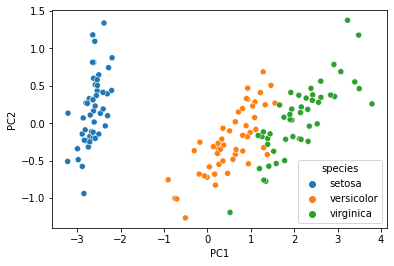

In [86]:
sns.scatterplot(x=iris_feat.PC1, y=iris_feat.PC2, hue=iris.species)

In [87]:
rf3 = RFC(n_estimators=50)

In [88]:
rf3.fit(iris_feat, iris.species)

RandomForestClassifier(n_estimators=50)

In [89]:
rfpred = rf3.predict(iris_feat)

In [90]:
print(classification_report(rfpred, iris.species))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

